In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

train = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/train.csv")
test = pd.read_csv("https://s3-ap-southeast-1.amazonaws.com/av-datahack-datacamp/test.csv")


In [40]:
#Combining both train and test dataset

train['Type']='Train' #Create a flag for Train and Test Data set
test['Type']='Test'
fullData = pd.concat([train,test],axis=0)

#Look at the available missing values in the dataset
fullData.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
Type                   0
dtype: int64

In [28]:
#Training and Testing data set are loaded in train and test dataframe respectively

# Look at the summary of numerical variables for train data set
df= fullData.describe()
print (df)

# Print the unique values and their frequency of variable Property_Area
df1=fullData.Property_Area.value_counts()
print (df1)

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       981.000000         981.000000  954.000000        961.000000   
mean       5179.795107        1601.916330  142.511530        342.201873   
std        5695.104533        2718.772806   77.421743         65.100602   
min           0.000000           0.000000    9.000000          6.000000   
25%        2875.000000           0.000000  100.000000        360.000000   
50%        3800.000000        1110.000000  126.000000        360.000000   
75%        5516.000000        2365.000000  162.000000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      902.000000  
mean         0.835920  
std          0.370553  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  
Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64


<AxesSubplot:title={'center':'LoanAmount'}, xlabel='Gender'>

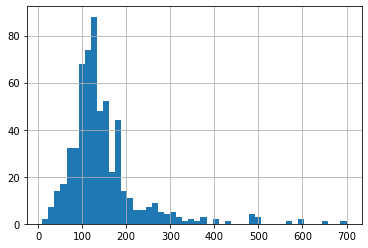

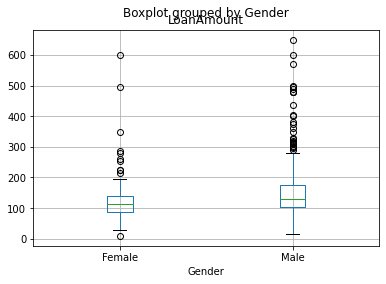

In [29]:
# Plot histogram for variable LoanAmount
train.LoanAmount.hist(bins=50)

# Plot a box plot for variable LoanAmount by variable Gender of training data set
train.boxplot(column='LoanAmount', by = 'Gender')

In [5]:
# Training and Testing dataset are loaded in train and test dataframe respectively

# Approved Loan in absolute numbers
loan_approval = train['Loan_Status'].value_counts()['Y']

# Two-way comparison: Credit History and Loan Status
twowaytable = pd.crosstab(train ["Credit_History"], train ["Loan_Status"], margins=True)
twowaytable

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [18]:
#Identify categorical and continuous variables
ID_col = ['Loan_ID']
target_col = ["Loan_Status"]
cat_cols = ['Credit_History','Dependents','Gender','Married','Education','Property_Area','Self_Employed']

other_col=['Type'] #Test and Train Data set identifier
num_cols= list(set(list(fullData.columns))-set(cat_cols)-set(ID_col)-set(target_col)-set(other_col))
num_cols

['Loan_Amount_Term', 'CoapplicantIncome', 'ApplicantIncome', 'LoanAmount']

In [26]:

fullData[num_cols]


,Loan_Amount_Term,CoapplicantIncome,ApplicantIncome,LoanAmount
0,360.0,0.0,5849,NaN
1,360.0,1508.0,4583,128.0
2,360.0,0.0,3000,66.0
3,360.0,2358.0,2583,120.0
4,360.0,0.0,6000,141.0
...,...,...,...,...
362,360.0,1777.0,4009,113.0
363,360.0,709.0,4158,115.0
364,360.0,1993.0,3250,126.0
365,360.0,2393.0,5000,158.0


In [36]:
# Impute missing value of LoanAmount with 168 for test data set
fullData['LoanAmount'].fillna(168, inplace=True)

# Impute missing value of Gender (Male is more frequent category)
fullData['Gender'].fillna('Male',inplace=True)


# Impute missing value of Credit_History ( 1 is more frequent category)
fullData['Credit_History'].fillna(1,inplace=True)

#Impute missing value of Loan_Amount_Term ( 360 is more frequent category)
fullData["Loan_Amount_Term"].fillna(fullData["Loan_Amount_Term"].mode(),inplace=True)


In [37]:
fullData

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Type
0,LP001002,1,0,0,0,0,5849,0.0,168.0,360.0,1,2,Y,Train
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,N,Train
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,Y,Train
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,Y,Train
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,Y,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,1,1,4009,1777.0,113.0,360.0,1,2,NaN,Test
363,LP002975,1,1,0,0,0,4158,709.0,115.0,360.0,1,2,NaN,Test
364,LP002980,1,0,0,0,0,3250,1993.0,126.0,360.0,1,1,NaN,Test
365,LP002986,1,1,0,0,0,5000,2393.0,158.0,360.0,1,0,NaN,Test


In [39]:
fullData["Loan_Amount_Term"].isnull().sum()


20

In [41]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

# Perform log transformation of TotalIncome to make it closer to normal
train['TotalIncome_log']= np.log(train['TotalIncome'])

In [42]:
for var in cat_cols:
    number = LabelEncoder()
    fullData[var] = number.fit_transform(fullData[var].astype(str))

train_modified=fullData[fullData['Type']=='Train']
test_modified=fullData[fullData['Type']=='Test']
train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype(str))
train_modified

<ipython-input-42-9f60a2222c2b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_modified["Loan_Status"] = number.fit_transform(train_modified["Loan_Status"].astype(str))


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Type
0,LP001002,1,0,0,0,0,5849,0.0,NaN,360.0,1,2,1,Train
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0,Train
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1,Train
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1,Train
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1,Train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1,0,1,Train
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1,0,1,Train
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1,2,1,Train
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1,2,1,Train


# Building Logistic Model

In [7]:
#Import module for Logistic regression
import sklearn.linear_model

# Select three predictors Credit_History, Education and Gender
predictors =['Credit_History','Education','Gender']

# Converting predictors and outcome to numpy array
x_train = train_modified[predictors].values
y_train = train_modified['Loan_Status'].values
x_test = test_modified[predictors].values

# Model Building
model = sklearn.linear_model.LogisticRegression()
model.fit(x_train, y_train)

NameError: name 'train_modified' is not defined

In [51]:
#Predict Output
predicted= model.predict(x_test)

#Reverse encoding for predicted outcome
predicted = number.inverse_transform(predicted)

#Store it to test dataset
test_modified['Loan_Status']=predicted

#Output file to make submission
test_modified.to_csv("Submission1.csv",columns=['Loan_ID','Loan_Status'])

<ipython-input-51-0ec4f34e36a8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_modified['Loan_Status']=predicted


PermissionError: [Errno 13] Permission denied: 'Submission1.csv'

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,x_train)
result=logit_model.fit()
print(result.summary())